In [91]:
! /opt/homebrew/opt/python@3.10/bin/python3.10 -m pip install nnfs



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: /opt/homebrew/opt/python@3.10/bin/python3.10 -m pip install --upgrade pip


In [4]:
from IPython.display import Image, display
import numpy as np

### Neuron using Numpy

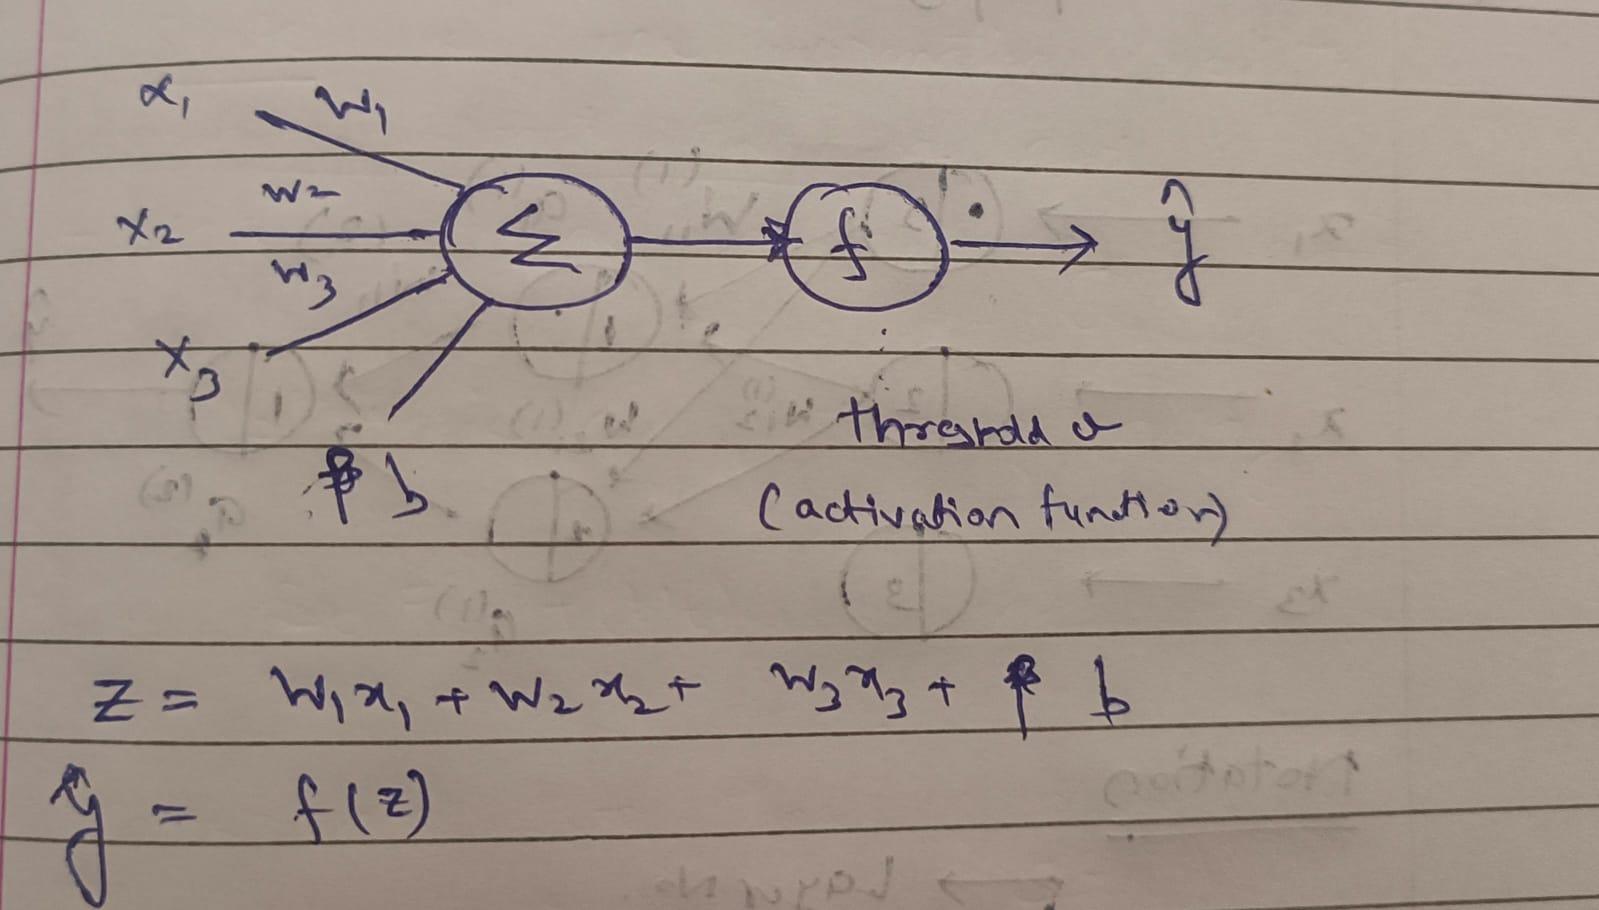

In [5]:
display(Image(filename='images/neuron.jpeg', width=300))

In [26]:
weights = np.array([0.2,0.34,0.23,0.98])
inputs = np.array([1,23,21,-2])
bias = 1

def activation_fun(val):
    if(z>=0):
        return 1
    else:
        return 0

z = np.dot(weights,inputs)+bias
print("Weighted sum : ",z)
y_hat = activation_fun(z)
print("Activtion Value :",y_hat)


Weighted sum :  11.89
Activtion Value : 1


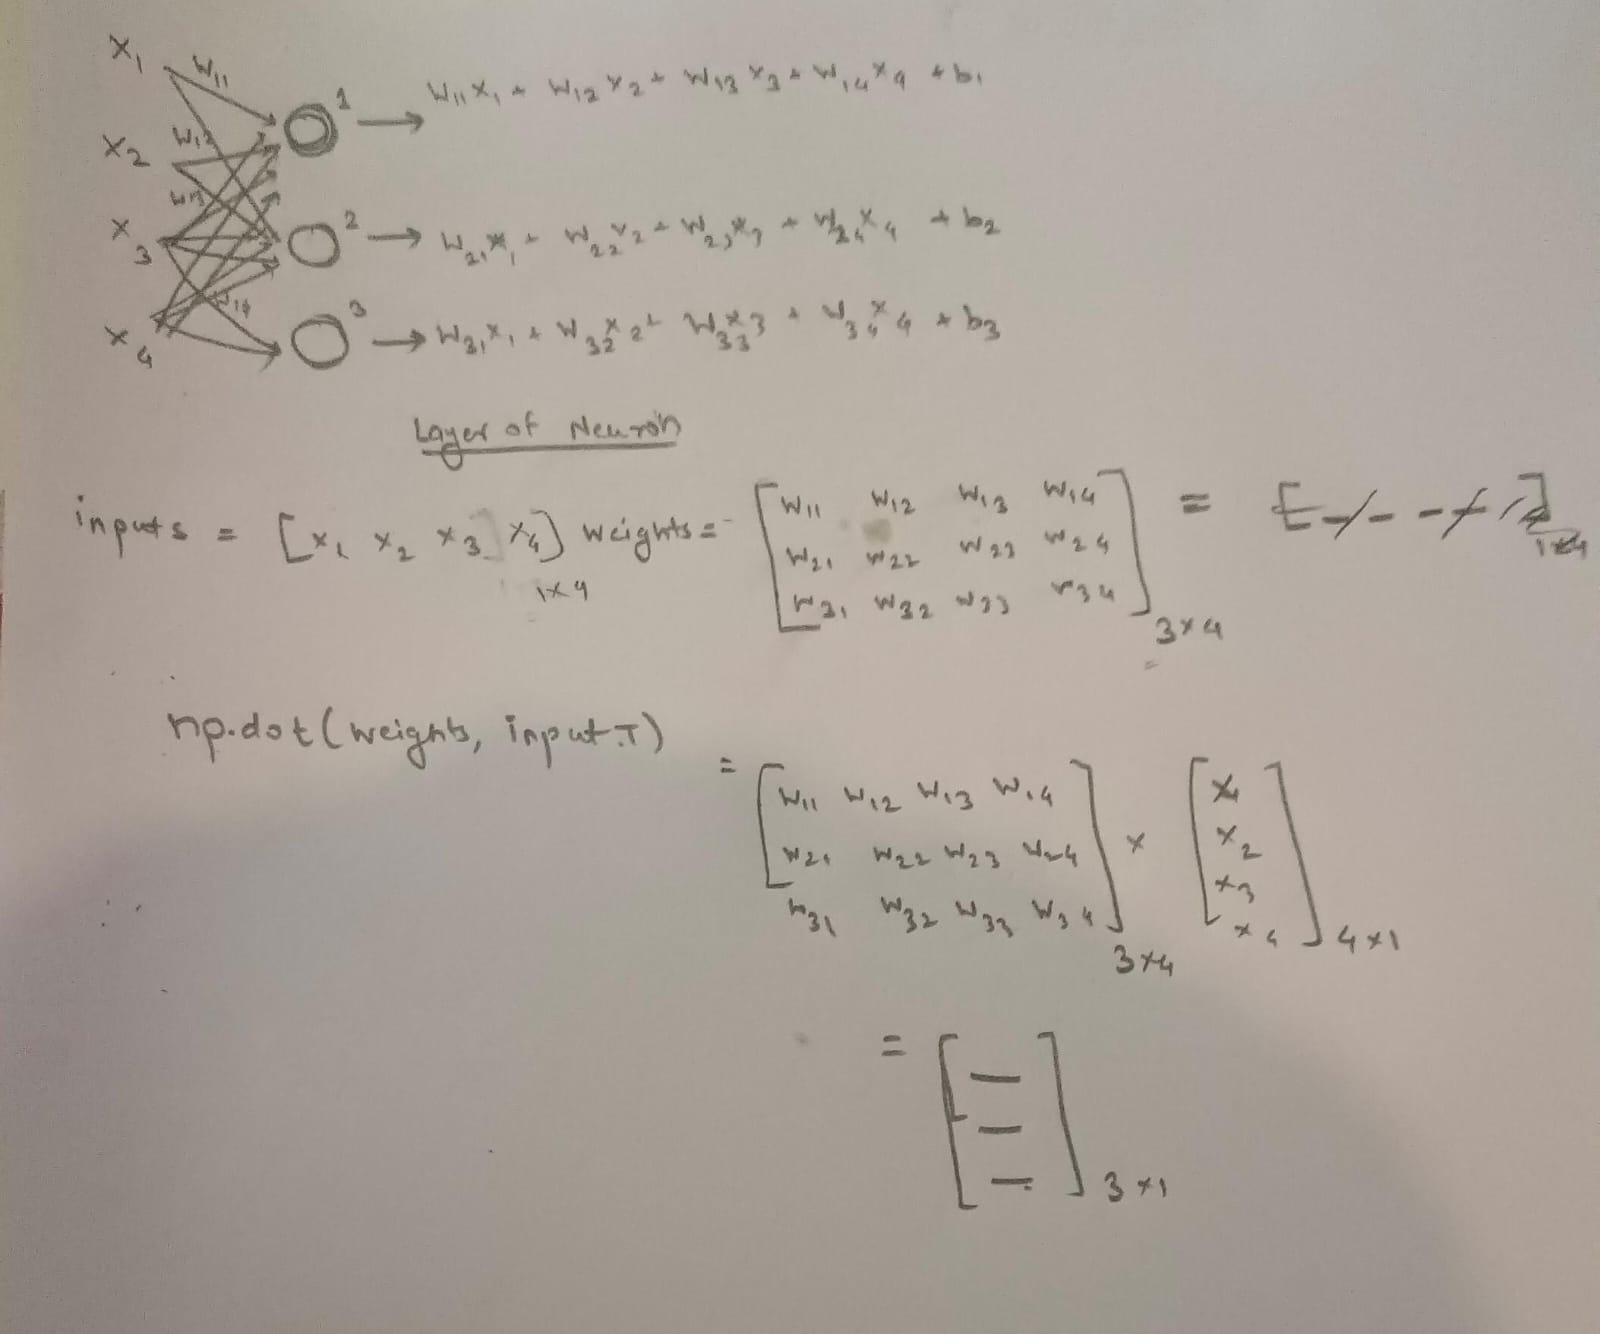

In [54]:
display(Image(filename='images/layer.jpg', width=450))

#Layer of Neuron

In [55]:
# layer inputs 
layer_inputs = np.array([1,23,21,7])

#weights of Layer
layer_weights = np.array([[0.1,0.3,0.2,0.4],
                 [0.13,0.23,0.21,0.44],
                 [0.19,0.33,0.52,20.24]])

layer_bias = [1,2,1]



In [56]:
layer_inputs = layer_inputs.T

In [57]:
print("Shape of Inputs :",layer_inputs.shape)
print("Shape of Layer Weights :",layer_weights.shape)

Shape of Inputs : (4,)
Shape of Layer Weights : (3, 4)


In [83]:
layer_dot = np.dot(layer_inputs,layer_weights.T)

In [84]:

layer_dot

array([ 14.  ,  12.91, 160.38])

In [66]:
#weighted sum
z = layer_dot + layer_bias
print("Weighted sum :",z)
def layer_activation_fun(val):
    return (val>=0).astype(int)

#activation 
y_hat_layer = layer_activation_fun(z)
print("Activation Value :", y_hat_layer)

Weighted sum : [ 15.    14.91 161.38]
Activation Value : [1 1 1]


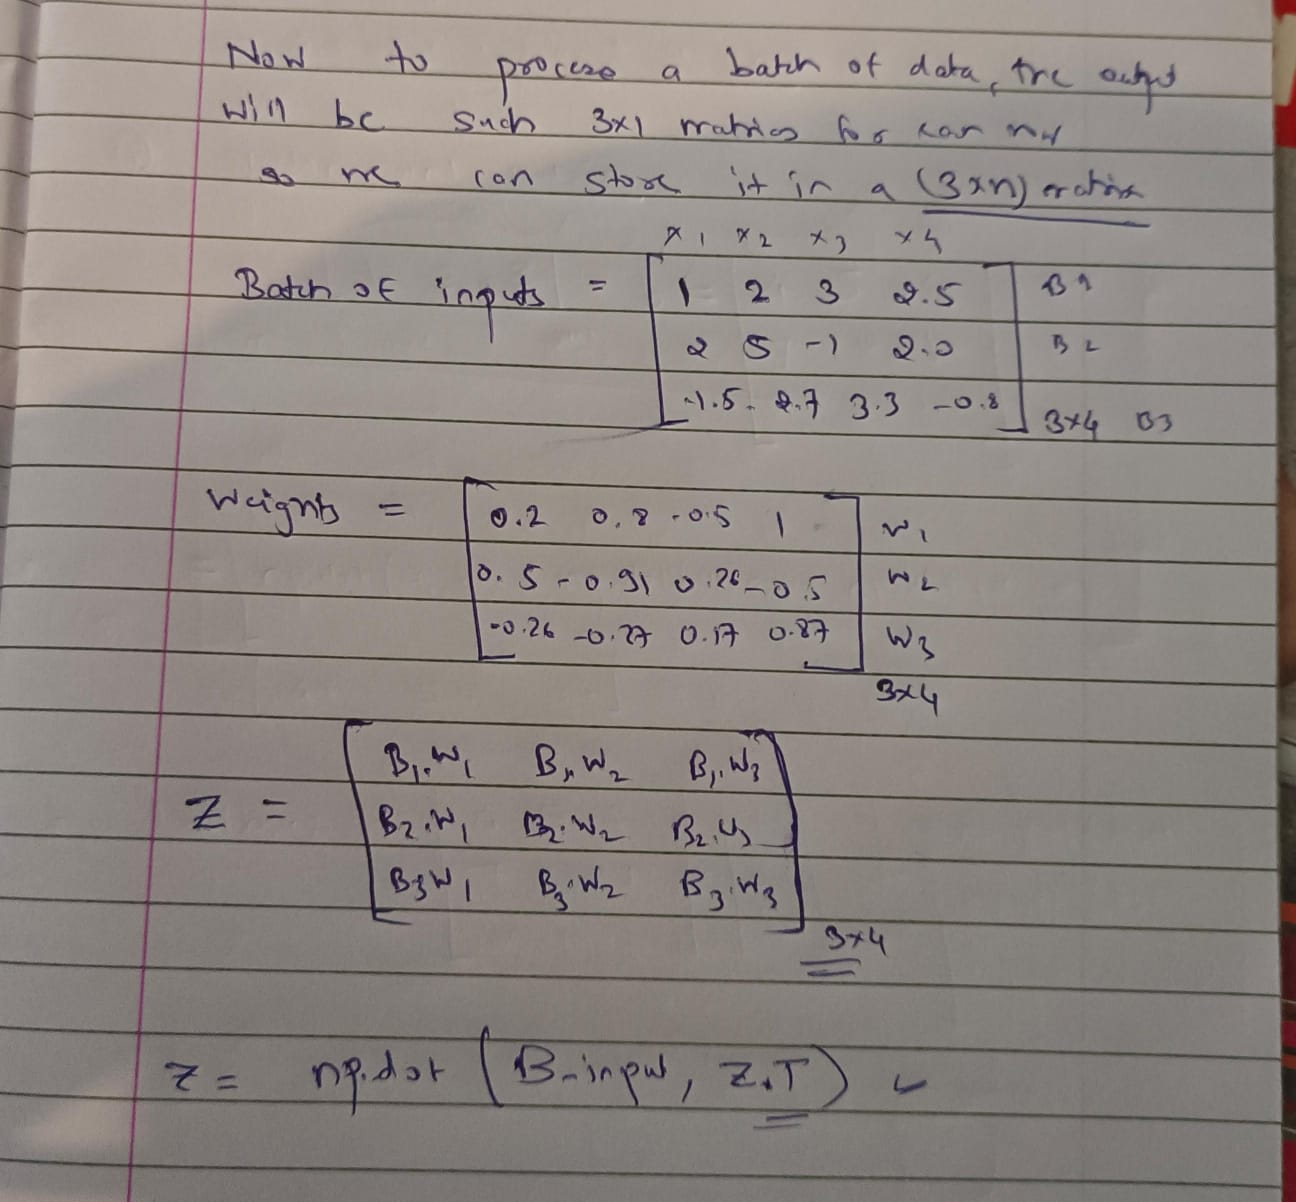

In [67]:
display(Image(filename='images/batch.jpg', width=450))


In [77]:
batch_of_input = [[1,0.22,0.33,4],
                  [1.2,2.2,3.1,4.9],
                  [0.1,2.2,3,14]]

batch_sum = np.dot(np.array(batch_of_input),layer_weights.T)
print("Batch :",batch_sum)

Batch : [[  1.832    2.0099  81.3942]
 [  3.36     3.469  101.742 ]
 [  6.87     7.309  285.665 ]]


In [78]:
z_batch = batch_sum + layer_bias

In [79]:
print("Z_batch: ",z_batch)

Z_batch:  [[  2.832    4.0099  82.3942]
 [  4.36     5.469  102.742 ]
 [  7.87     9.309  286.665 ]]


In [80]:
result = layer_activation_fun(z_batch)
result

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

##### GENERATING NON-LINEAR DATA 

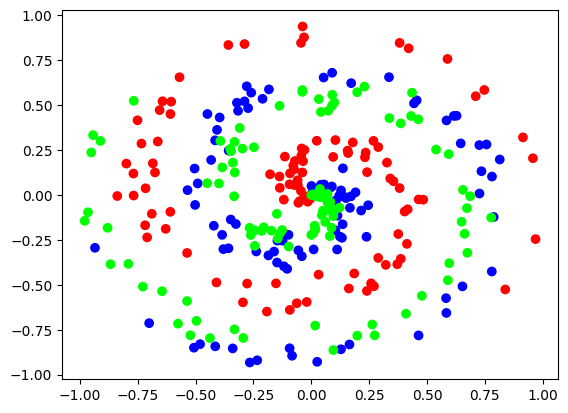

In [95]:
from nnfs.datasets import spiral_data
import nnfs
nnfs.init()
import matplotlib.pyplot as plt
x,y = spiral_data(samples=100,classes=3)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='brg')
plt.show()

In [120]:
# Dense Layer

class Dense:

    def __init__(self,n_input,neurons):
        
        self.weight_matrix = np.random.randn(n_input,neurons)
        self.bias = np.random.randn(neurons)


    def forward(self,input_matrix):
        z = np.dot(input_matrix,self.weight_matrix) + self.bias
        return z
    
        

In [ ]:
 layer1 = Dense(2,3)


In [ ]:
dense_inputs =  np.array([[2, 2]]) 
layer1.forward(dense_inputs)

array([[-0.7802521, -1.1539035,  2.9459245]], dtype=float32)

###  Calculating Network Error with Loss

##### Categorical cross entrophy Loss function

In [127]:
softmax_output = np.array([[0.7,0.1,0.2],
                  [0.1,0.5,0.4],
                  [0.02,0.9,0.08]])
class_targets = [0,1,1]
print(softmax_output[[0,1,2],class_targets])

[0.7 0.5 0.9]


In [130]:
print(-np.log(softmax_output[[0,1,2],class_targets]))

[0.35667494 0.69314718 0.10536052]


In [136]:
#if outputs are one hot encoded

output_y = np.array([[1,0,0],
                    [0,1,0],
                    [0,1,0]])

y_predicted = np.array([[0.7,0.1,0.2],
                       [0.1,0.5,0.4],
                       [0.02,0.9,0.08]])

A = output_y*y_predicted

print("Element Wise Multiplication : ",A)

B = np.sum(A,axis=1)
C = -np.log(B)
print(np.mean(C))

Element Wise Multiplication :  [[0.7 0.  0. ]
 [0.  0.5 0. ]
 [0.  0.9 0. ]]
0.38506088005216804
